In [2]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import os

In [3]:
%load_ext dotenv
%dotenv ../.env

In [4]:
cnx = create_engine(os.getenv('EDMDB'))

In [37]:
df = pd.read_sql_query('''SELECT * FROM dcp.pluto201 WHERE ownertype > ' ';''', cnx)
df = df[["bbl", "ownertype", "ownername", "geom"]]
df.head()

,bbl,ownertype,ownername,geom
0,2.029180e+09,X,1887 BATHGATE PROPERTIES LLC,0106000020D70800000100000001030000000100000008...
1,4.047580e+09,X,VILLAS AT WHITESTONENEWS HOMEOWNERS ASSO CIATES,0106000020D70800000100000001030000000100000007...
2,1.009670e+09,X,NEW YORK CITY SCHOOL CONSTRUCTION AUTHOR ITY,0106000020D70800000100000001030000000100000005...
3,3.017940e+09,O,NYC HOUSING AUTHORITY,0106000020D70800000100000001030000000100000006...
4,3.069790e+09,X,SEA RISE I DEVELOPMENT COMPANY LLC,0106000020D70800000100000001030000000100000007...


In [42]:
type_counts = df['ownertype'].value_counts()
type(type_counts)
type_counts
df_dist = pd.DataFrame({'ownertype':type_counts.index, 'count':type_counts.values})
df_dist

,ownertype,count
0,X,17299
1,C,11505
2,O,1356
3,P,513
4,M,78


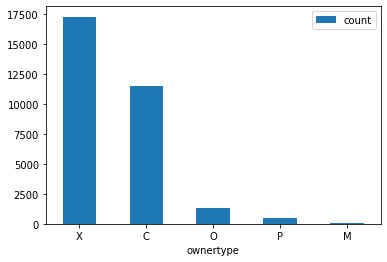

In [43]:
ax = df_dist.plot.bar(x='ownertype', y='count', rot=0)

In [69]:
city = df['ownertype'] == "C"
df_city = df[city]
all_city = df[city]
df_city = df_city[~df_city["ownername"].str.contains('CITY OF NEW YORK')]
df_city = df_city[~df_city["ownername"].str.contains('MTA - STATEN ISLAND RAILWAY')]
df_city = df_city[~df_city["ownername"].str.contains('FIRE DEPARTMENT OF NEW YORK')]
df_city = df_city[~df_city["ownername"].str.contains('NEW YORK PUBLIC LIBRARY')]
df_city = df_city[~df_city["ownername"].str.contains('BROOKLYN PUBLIC LIBRARY')]
df_city = df_city[~df_city["ownername"].str.contains('QUEENS PUBLIC LIBRARY')]
df_city = df_city[~df_city["ownername"].str.contains('CITY UNIVERSITY OF NEW YORK')]
df_city = df_city[~df_city["ownername"].str.contains('OFFICE OF THE CHIEF MEDICAL')]
df_city = df_city[~df_city["ownername"].str.contains('HIGHBRIDGE PRESERVATION LLC')]
df_city = df_city[~df_city["ownername"].str.contains('TAXI & LIMOUSINE COMMISSION')]
df_city = df_city[~df_city["ownername"].str.startswith('NYC')]
df_city = df_city[~df_city["ownername"].str.startswith('NEW YORK CITY')]
df_city = df_city[~df_city["ownername"].str.startswith('EAST HARLEM')]
df_city = df_city[~df_city["ownername"].str.startswith('RESTORING COMMUNITIES')]
df_city = df_city[~df_city["ownername"].str.startswith('BROOKLYN BRIDGE PARK')]
df_city = df_city[~df_city["ownername"].str.startswith('BROOKLYN NAVY')]
df_city = df_city[~df_city["ownername"].str.startswith('SO BX')]
df_city = df_city[~df_city["ownername"].str.startswith('IPIS')]
df_city = df_city[~df_city["ownername"].str.startswith('FULTON PK')]
df_city = df_city[["ownername"]]
df_city = df_city.drop_duplicates()
city_results = pd.merge(all_city, df_city, how='inner', on=['ownername'])
city_results.to_csv('../output/city_illogical_ownernames.csv')